## Plots illustrating ProBiS-Dock viral dataset composition

## Imports

In [4]:
import base_defs as base
from importlib import reload; reload(base)
import zipfile
import time
import MDAnalysis as mda
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import shutup
from io import BytesIO
from io import StringIO
import gzip as gz
import warnings
import os
import re
import random
import pickle

zip_path_virus = "/media/andrej/KEYCHAIN II/bsr_data/ProBiS_Dock_DB_bs_id1division_id9.zip"
#zip_path_virus = "E:/bsr_data/ProBiS_Dock_DB_bs_id1division_id9.zip"


/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data loading, preparation

In [5]:
reload(base)
counts = base.get_sum_from_tsv("./data/virus_cluster_out/")
counts.transpose()

ALA     ARG     ASN     ASP    CYS     GLN     GLU     GLY  \
bsite_surf   10130   20236   27463   16660   2340   17782   21811   24488   
bsite_core   12725   10137   10524    7129   8649    8292    7152   12862   
other_surf   61879   69663   91186   86692  11056   64560   97941   99996   
other_core   84348   31400   39459   29620  44309   32567   28910   80277   
total       169082  131436  168632  140101  66354  123201  155814  217623   

              HIS     ILE     LEU     LYS    MET     PHE     PRO     SER  \
bsite_surf   8267   12302   13074   32830   4527    4953   21379   17857   
bsite_core   4887   23548   26842    5480   6283   12279    8694   16025   
other_surf  24932   44587   65192  108522  16217   22902   80425   89291   
other_core  22479  106984  135362   24915  30422   69364   48564   72786   
total       60565  187421  240470  171747  57449  109498  159062  195959   

               THR    TRP     TYR     VAL  
bsite_surf   22234   5809    6716   11335  
bsite_core   14800   9620   12757   21455  
other_surf  108536  13035   29594   54960  
other_core   73290  28497   59530  112548  
total       218860  56961  108597  200298

In [6]:
reload(base)
counts = base.get_sum_from_tsv("./data/validation_virus_out/")
counts.transpose()

ALA     ARG     ASN     ASP    CYS     GLN     GLU     GLY  \
bsite_surf   10130   20236   27463   16660   2340   17782   21811   24488   
bsite_core   12725   10137   10524    7129   8649    8292    7152   12862   
other_surf   61879   69663   91186   86692  11056   64560   97941   99996   
other_core   84348   31400   39459   29620  44309   32567   28910   80277   
total       169082  131436  168632  140101  66354  123201  155814  217623   

              HIS     ILE     LEU     LYS    MET     PHE     PRO     SER  \
bsite_surf   8267   12302   13074   32830   4527    4953   21379   17857   
bsite_core   4887   23548   26842    5480   6283   12279    8694   16025   
other_surf  24932   44587   65192  108522  16217   22902   80425   89291   
other_core  22479  106984  135362   24915  30422   69364   48564   72786   
total       60565  187421  240470  171747  57449  109498  159062  195959   

               THR    TRP     TYR     VAL  
bsite_surf   22234   5809    6716   11335  
bsite_core   14800   9620   12757   21455  
other_surf  108536  13035   29594   54960  
other_core   73290  28497   59530  112548  
total       218860  56961  108597  200298

In [3]:
all_AAs=["ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
categories = ["bsite_surf","bsite_core","other_surf", "other_core", "total"]

In [74]:
counts

bsite_surf  bsite_core  other_surf  other_core   total
ALA       10130       12725       61879       84348  169082
ARG       20236       10137       69663       31400  131436
ASN       27463       10524       91186       39459  168632
ASP       16660        7129       86692       29620  140101
CYS        2340        8649       11056       44309   66354
GLN       17782        8292       64560       32567  123201
GLU       21811        7152       97941       28910  155814
GLY       24488       12862       99996       80277  217623
HIS        8267        4887       24932       22479   60565
ILE       12302       23548       44587      106984  187421
LEU       13074       26842       65192      135362  240470
LYS       32830        5480      108522       24915  171747
MET        4527        6283       16217       30422   57449
PHE        4953       12279       22902       69364  109498
PRO       21379        8694       80425       48564  159062
SER       17857       16025       89291       72786  195959
THR       22234       14800      108536       73290  218860
TRP        5809        9620       13035       28497   56961
TYR        6716       12757       29594       59530  108597
VAL       11335       21455       54960      112548  200298

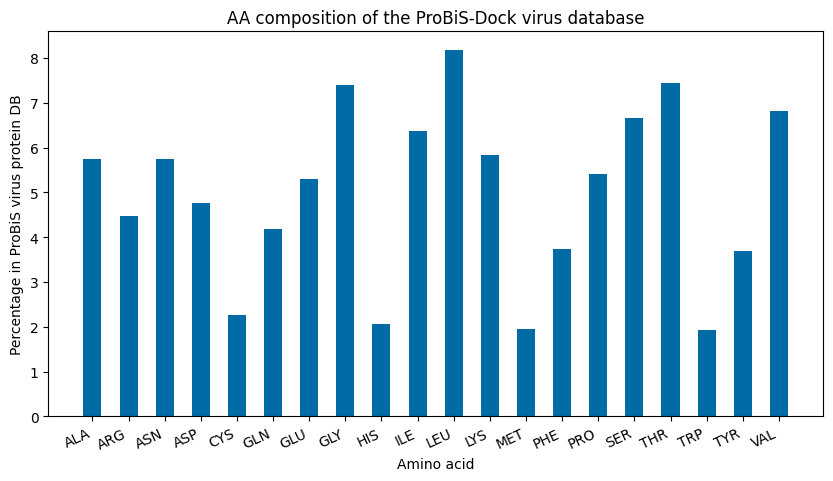

In [7]:
counts_percentages = counts.div(counts["total"].sum()/100)

x = [row[0] for row in counts_percentages.iterrows()]
y = [row[1]["total"] for row in counts_percentages.iterrows()]

# fig = plt.figure()
# plt.figure().clear()
# plt.close()
# plt.cla()
# plt.clf()

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=x, height=y, width=0.5)
plt.xlabel("Amino acid")
plt.ylabel("Percentage in ProBiS virus protein DB")
plt.xticks(rotation=25, ha='right')
plt.title("AA composition of the ProBiS-Dock virus database")
plt.show()


Text(0.5, 1.0, 'ProBiS-Dock virus database composition by region and AA category')

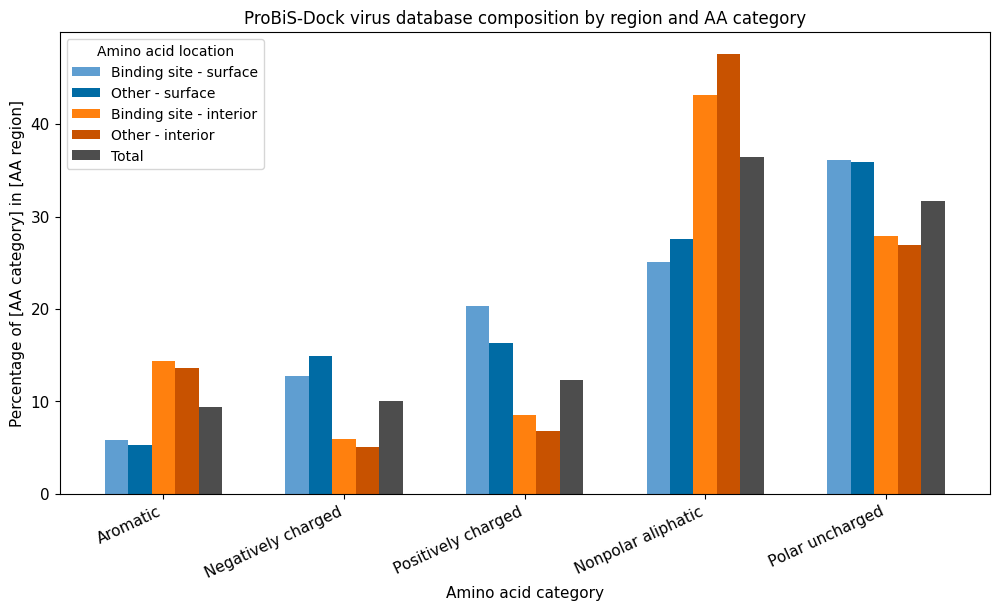

In [72]:
residue_categories = base.get_residue_categories()

count_normalized = counts.reset_index() #pd.DataFrame(result, index=["non_bsite", "bsite"]).transpose().reset_index().fillna(0)
# divide all res counts by total no of residues, or divide each res X by total no of X?
count_normalized["categories"] = count_normalized["index"].apply(lambda x: residue_categories[x])


count_normalized = count_normalized[["categories", "bsite_surf", "other_surf", "bsite_core", "other_core", "total"]].groupby("categories").sum().reset_index()

count_normalized = count_normalized.reindex([0,1,4,2,3])

for row in ["bsite_surf","other_surf","bsite_core","other_core","total"]:
    count_normalized[row]=count_normalized[row].div(count_normalized[row].sum()/100) 

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots()
color = ['C4','C0', 'C1', 'C5', '0.3']

count_normalized.plot.bar(x=0, ax=ax, width=0.65, figsize=(12, 6), fontsize=11, color=color)
plt.xticks([0,1,2,3,4],["Aromatic", "Negatively charged", "Positively charged","Nonpolar aliphatic","Polar uncharged",], rotation=25, ha='right')
plt.ylabel("Percentage of [AA category] in [AA region]", fontsize=11)
plt.xlabel("Amino acid category", fontsize=11)
plt.legend(["Binding site - surface","Other - surface","Binding site - interior","Other - interior","Total"], title="Amino acid location")
plt.title("ProBiS-Dock virus database composition by region and AA category")
#ax.set_xticklabels()

Text(0.5, 1.0, 'ProBiS-Dock virus database composition by region and AA type')

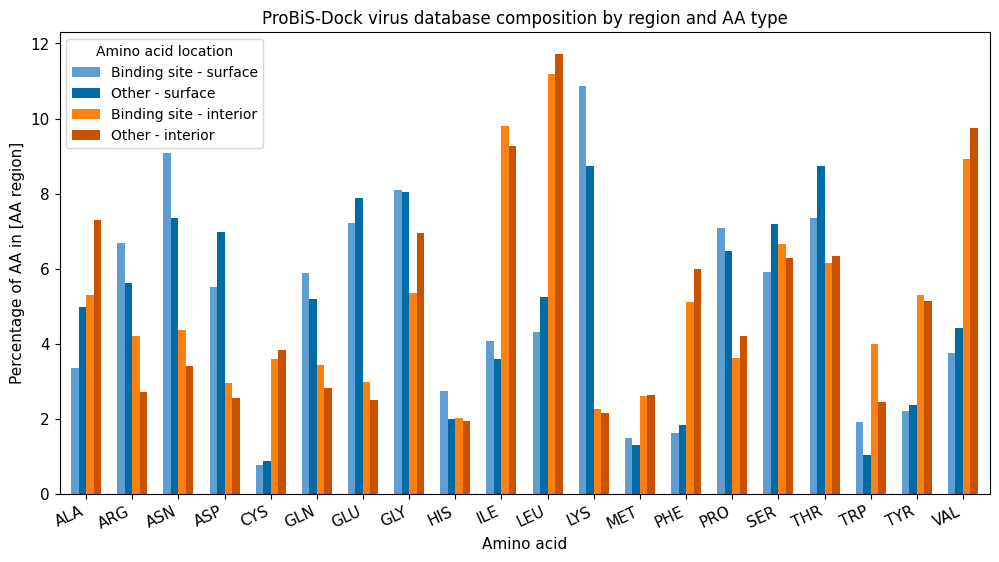

In [71]:
count_normalized = counts.reset_index() #pd.DataFrame(result, index=["non_bsite", "bsite"]).transpose().reset_index().fillna(0)
# divide all res counts by total no of residues, or divide each res X by total no of X?

count_normalized = count_normalized[["index", "bsite_surf", "other_surf", "bsite_core", "other_core"]].groupby("index").sum().reset_index()


for row in ["bsite_surf","other_surf","bsite_core","other_core"]:
    count_normalized[row]=count_normalized[row].div(count_normalized[row].sum()/100) 

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots()
color = ['C4','C0', 'C1', 'C5', '0.3']

count_normalized.plot.bar(x=0, ax=ax, width=0.65, figsize=(12, 6), fontsize=11, color=color)
plt.xticks(rotation=25, ha='right')
plt.ylabel("Percentage of AA in [AA region]", fontsize=11)
plt.xlabel("Amino acid", fontsize=11)
plt.legend(["Binding site - surface","Other - surface","Binding site - interior","Other - interior","Total"], title="Amino acid location")
plt.title("ProBiS-Dock virus database composition by region and AA type")
#ax.set_xticklabels()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'aromatic'),
  Text(1, 0, 'negatively_charged'),
  Text(2, 0, 'nonpolar_aliphatic'),
  Text(3, 0, 'polar_uncharged'),
  Text(4, 0, 'positively_charged')])

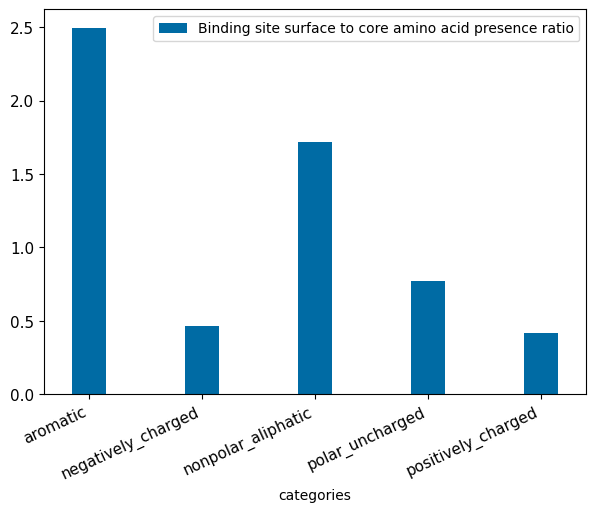

In [26]:
plt.style.use('fast')
fig, ax = plt.subplots()
count_normalized["bsite surface : bsite core ratio"] = count_normalized["bsite_core"].div(count_normalized["bsite_surf"])
count_normalized[["categories","bsite surface : bsite core ratio"]].plot.bar(x=0, ax=ax, width=0.3, figsize=(7, 5), fontsize=11)
plt.legend(["Binding site surface to core amino acid presence ratio"])
plt.xticks(rotation=25, ha='right')

In [52]:
count_100_totals = count_normalized[["categories","bsite_core", "bsite_surf", "total"]]
# for col in count_100_totals.columns[1:]:
#     count_100_totals[col]=count_100_totals[col].div(count_100_totals["total"]/100)
count_100_totals

categories  bsite_core  bsite_surf      total
0            aromatic   14.431582    5.783721   9.358416
1  negatively_charged    5.946948   12.730606  10.068115
2  nonpolar_aliphatic   43.189390   25.101839  36.485048
3     polar_uncharged   27.893729   36.087864  31.712377
4  positively_charged    8.538353   20.295970  12.376043

Text(0.5, 1.0, '')

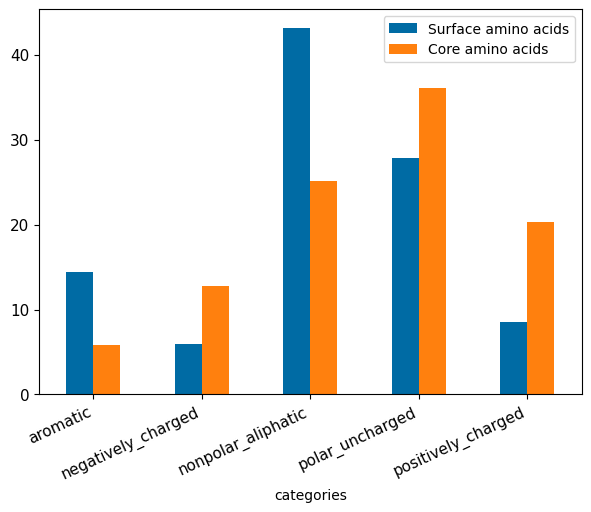

In [53]:
plt.style.use('fast')
fig, ax = plt.subplots()
count_normalized[["categories","bsite_core", "bsite_surf"]].plot.bar(x=0, ax=ax, width=0.5, figsize=(7, 5), fontsize=11)
plt.legend(["Surface amino acids", "Core amino acids"])
plt.xticks(rotation=25, ha='right')
plt.title("")

In [ ]:
residue_categories = base.get_residue_categories()

count_normalized = counts.reset_index() #pd.DataFrame(result, index=["non_bsite", "bsite"]).transpose().reset_index().fillna(0)
# divide all res counts by total no of residues, or divide each res X by total no of X?
count_normalized["categories"] = count_normalized["index"].apply(lambda x: residue_categories[x])
count_normalized["categories"].reindex([4,1,3,2,0])

count_normalized = count_normalized[["categories", "bsite_surf", "other_surf", "bsite_core", "other_core", "total"]].groupby("categories").sum().reset_index()

for row in ["bsite_surf","other_surf","bsite_core","other_core","total"]:
    count_normalized[row]=count_normalized[row].div(count_normalized[row].sum()/100) 

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots()
color = ['C4','C0', 'C1', 'C5', '0.3']

count_normalized.plot.bar(x=0, ax=ax, width=0.65, figsize=(12, 6), fontsize=11, color=color)
plt.xticks([0,1,2,3,4],["Positively charged","Negatively charged","Polar uncharged","Nonpolar aliphatic","Aromatic"],rotation=25, ha='right')
plt.ylabel("Percentage of [AA category] in [AA location]", fontsize=11)
plt.xlabel("Amino acid category", fontsize=11)
plt.legend(["Binding site - surface","Other - surface","Binding site - interior","Other - interior","Total"], title="Amino acid location")

#ax.set_xticklabels()

In [55]:
residue_categories = base.get_residue_categories()
count_normalized = counts.reset_index()
count_normalized["categories"] = count_normalized["index"].apply(lambda x: residue_categories[x])
count_normalized["categories"].reindex([4,1,3,2,0])
count_normalized = count_normalized[["categories", "bsite_surf", "other_surf", "bsite_core", "other_core", "total"]].groupby("categories").sum().reset_index()
for row in ["bsite_surf","other_surf","bsite_core","other_core","total"]:
    count_normalized[row]=count_normalized[row].div(count_normalized[row].sum()/100)
count_normalized

categories  bsite_surf  other_surf  bsite_core  other_core  \
0            aromatic    5.783721    5.279793   14.431582   13.619486   
1  negatively_charged   12.730606   14.875770    5.946948    5.064765   
2  nonpolar_aliphatic   25.101839   27.621688   43.189390   47.587941   
3     polar_uncharged   36.087864   35.857734   27.893729   26.909541   
4  positively_charged   20.295970   16.365015    8.538353    6.818266   

       total  
0   9.358416  
1  10.068115  
2  36.485048  
3  31.712377  
4  12.376043

## Human rerun

In [103]:
reload(base)
human_counts = base.get_sum_from_tsv("E:/bsiteaa/data/human_cluster_out/")
human_counts.transpose()

ALA     ARG     ASN     ASP     CYS     GLN     GLU      GLY  \
bsite_surf    33765   62530   38663   59717    7918   38145   62933    61878   
bsite_core    75715   37873   37146   46927   29831   24079   39394    71608   
other_surf   349256  473011  371620  523784   51223  402420  694432   454918   
other_core   552780  194143  169526  191009  216632  159757  183752   417332   
total       1011516  767557  616955  821437  305604  624401  980511  1005736   

               HIS     ILE      LEU     LYS     MET     PHE     PRO     SER  \
bsite_surf   27868   26553    52714   72497   14361   31403   40587   49495   
bsite_core   40296   82360   132405   30602   42923   80481   25499   60198   
other_surf  200510  166273   372051  701647   94150  138028  426944  509814   
other_core  140797  547581   929087  123290  193057  415947  233521  365801   
total       409471  822767  1486257  928036  344491  665859  726551  985308   

               THR     TRP     TYR      VAL  
bsite_surf   41715   15849   41111    32549  
bsite_core   48294   26531   62187    94182  
other_surf  422155   55867  164248   260273  
other_core  314858  140994  307020   673039  
total       827022  239241  574566  1060043

Text(0.5, 1.0, 'ProBiS-Dock human database composition by region and AA category')

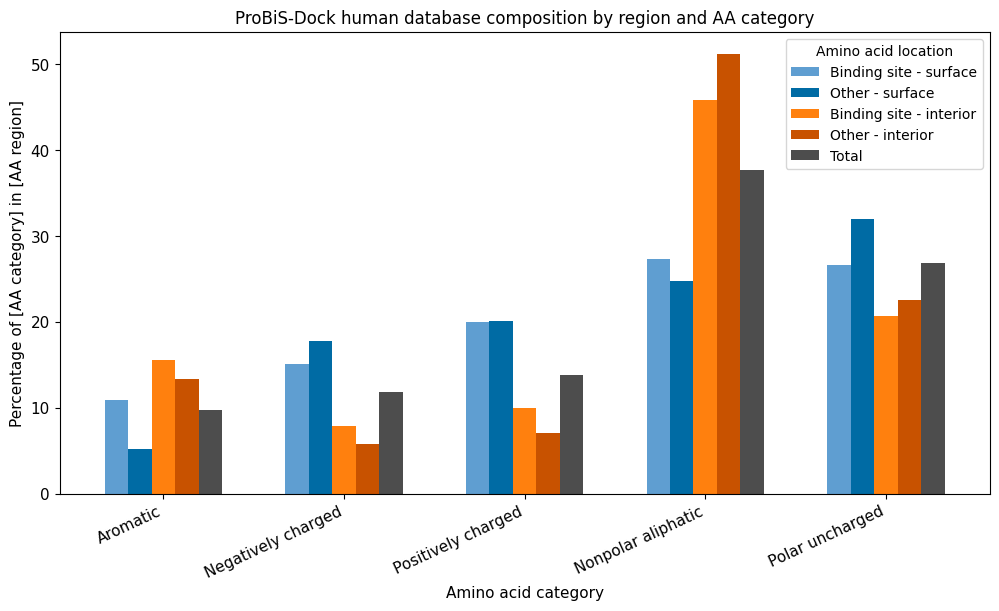

In [130]:
residue_categories = base.get_residue_categories()

human_count_normalized = human_counts.reset_index() #pd.DataFrame(result, index=["non_bsite", "bsite"]).transpose().reset_index().fillna(0)
# divide all res counts by total no of residues, or divide each res X by total no of X?
human_count_normalized["categories"] = human_count_normalized["index"].apply(lambda x: residue_categories[x])


human_count_normalized = human_count_normalized[["categories", "bsite_surf", "other_surf", "bsite_core", "other_core", "total"]].groupby("categories").sum().reset_index()

human_count_normalized = human_count_normalized.reindex([0,1,4,2,3])

for row in ["bsite_surf","other_surf","bsite_core","other_core","total"]:
    human_count_normalized[row]=human_count_normalized[row].div(human_count_normalized[row].sum()/100) 

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots()
color = ['C4','C0', 'C1', 'C5', '0.3']

human_count_normalized.plot.bar(x=0, ax=ax, width=0.65, figsize=(12, 6), fontsize=11, color=color)
plt.xticks([0,1,2,3,4],["Aromatic", "Negatively charged", "Positively charged","Nonpolar aliphatic","Polar uncharged",], rotation=25, ha='right')
plt.ylabel("Percentage of [AA category] in [AA region]", fontsize=11)
plt.xlabel("Amino acid category", fontsize=11)
plt.legend(["Binding site - surface","Other - surface","Binding site - interior","Other - interior","Total"], title="Amino acid location")
plt.title("ProBiS-Dock human database composition by region and AA category")
#ax.set_xticklabels()

In [136]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']   
for i, color in enumerate(colors):
    if i in [0,1,4,5]:
        print(color)      

#006BA4
#FF800E
#5F9ED1
#C85200


In [90]:
counts_per_pdb =  pd.read_csv(filepath_or_buffer="E:/bsiteaa/data/out/probis_aa_composition.tsv", sep="\t")

In [99]:
counts_per_pdb.max()

pdb_id            9hvp
num_bsites         117
num_chains          21
bsite_surf_ALA      43
bsite_surf_ARG      43
                  ... 
total_SER          920
total_THR          900
total_TRP          240
total_TYR          500
total_VAL          560
Length: 103, dtype: object

In [98]:
counts_per_pdb.idxmax()

pdb_id            5149
num_bsites        4905
num_chains        1486
bsite_surf_ALA    4855
bsite_surf_ARG    2865
                  ... 
total_SER         1832
total_THR         1541
total_TRP         1541
total_TYR         1541
total_VAL         1832
Length: 103, dtype: int64

In [96]:
counts_per_pdb.iloc[1486]

pdb_id            3j34
num_bsites         108
num_chains          21
bsite_surf_ALA      15
bsite_surf_ARG      12
                  ... 
total_SER          189
total_THR          336
total_TRP          105
total_TYR           84
total_VAL          315
Name: 1486, Length: 103, dtype: object

In [100]:
counts_per_pdb.iloc[4905]

pdb_id            6u8q
num_bsites         117
num_chains          12
bsite_surf_ALA      34
bsite_surf_ARG      25
                  ... 
total_SER          108
total_THR          138
total_TRP           72
total_TYR           68
total_VAL          226
Name: 4905, Length: 103, dtype: object